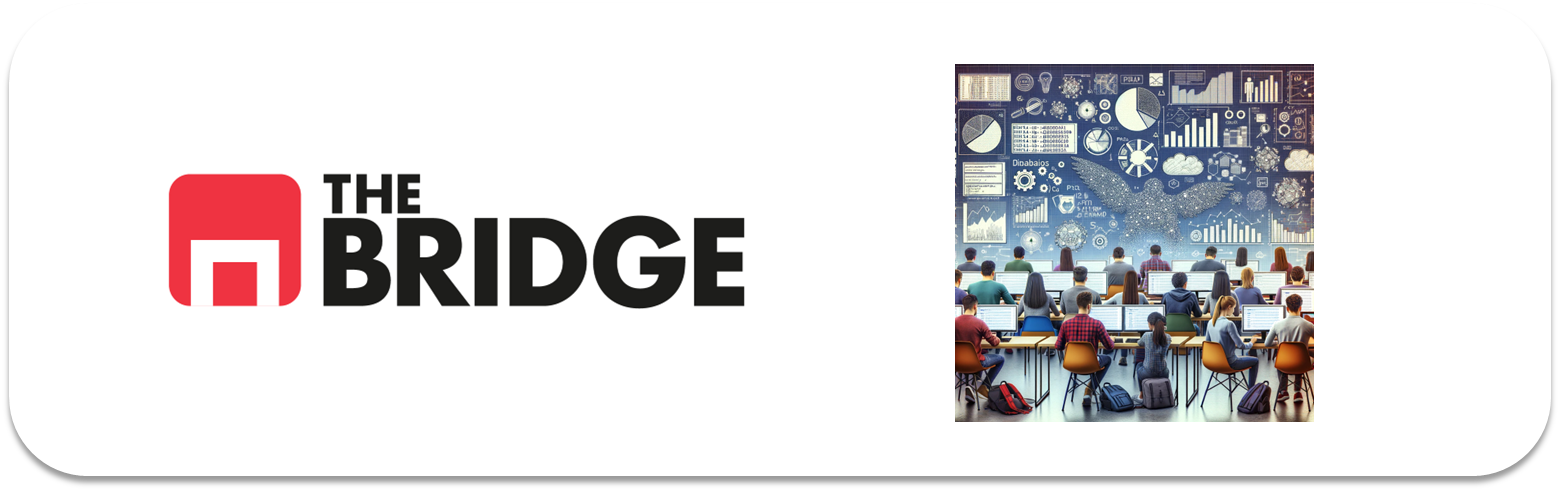

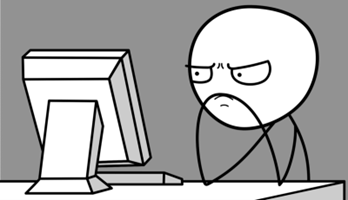

Para ejercitarte y afianzar lo aprendido sobre **Modelado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


### Ejercicio 1

Ejecuta la siguiente celda para repetir las transformaciones que hicimos en los ejercicios pasados:

In [2]:
df = pd.read_csv("./data/advertising_ml.csv")
df["Age"] = df.Age.str.replace(r"[year|años]","", regex= True).astype(int) 
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
train_set = pd.get_dummies(train_set, columns=["Country"])
train_set.reset_index(inplace = True)
features_num = ["Age","Area Income","Daily Internet Usage","Daily Time Spent on Site"]
std_scaler = StandardScaler()
resultado = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)

train_set[features_num] = resultado.copy()


### Ejercicio 2

Vamos a utilizar dos tecnologías para crear sendos modelos: la regresión logística y el ensamblado de árboles conocido como random forest. Ejecuta la siguiente celda para instanciarlos:

In [3]:
log_class = LogisticRegression()

rforest_class = RandomForestClassifier(n_estimators= 20, max_depth= 3, max_leaf_nodes= 5)



### Ejercicio 3

Ahora creamos X e y para hacer el ajuste o entrenamiento de los modelos. Recuerda X tiene sólo las features e y el target:

In [4]:
features_num = ["Age","Area Income","Daily Internet Usage","Daily Time Spent on Site"]
features_cat = [col for col in train_set.columns if col.startswith("Country_")]
features = features_num + features_cat
target = "Clicked on Ad"
X = train_set[features]
y = train_set[target]


### Ejemplo 4

Entrena los modelos llamando al método `fit` de cada modelo con X e y como argumentos:

In [5]:
log_class.fit(X,y)
rforest_class.fit(X,y)

RandomForestClassifier(max_depth=3, max_leaf_nodes=5, n_estimators=20)

### Ejemplo 5

La métrica que vamos a emplear es la "accuracy", pero en las siguientes unidades veremos todo el rango que se aplica a los problemas de clasificación. Obtén la `accuracy` de los dos modelos para el set de train:
 

In [6]:
y_pred_log = log_class.predict(X)
accuracy_score(y, y_pred_log)

0.97875

In [7]:
y_pred_rforest = rforest_class.predict(X)
accuracy_score(y, y_pred_rforest)

0.9425

*En principio nos quedaríamos con el modelo de regresión logística, pero ya sabemos que los modelos se sobreajustan a los datasets de entrenamiento y para eso usamos la validación cruzada*

### Ejemplos 6

Utilizando la validación cruzada (cross_validation_score) con 5 folds, escoge uno de los dos modelos (utiliza "accuracy" como valor del parámetro `scoring` dentro de cross_validation_score):

In [8]:

cv_log = cross_val_score(log_class, X, y, cv=5, scoring='accuracy')
cv_rforest = cross_val_score(rforest_class, X, y, cv = 5, scoring = "accuracy")

In [9]:
cv_log.mean()

0.9712500000000001

In [10]:
cv_rforest.mean()

0.9174999999999999

*Además de obtener valores muy altos, seguimos escogiendo el algoritmo de regresión logistica, que veremos en un próximo sprint*

### Ejercicio 7

Haz la prueba final del modelo contra el dataset de test, ejecuta primero la siguiente celda que prepara el set de test de igual manera a como se preparó el de train


In [11]:

test_set = pd.get_dummies(test_set, columns=["Country"])
test_set.reset_index(inplace = True)
resultado = pd.DataFrame(std_scaler.transform(test_set[features_num]),columns = features_num)
test_set[features_num] = resultado.copy()
# Como puede haber paises que estan en train pero no en test:
for col in features_cat:
    if features_cat not in test_set.columns.to_list():
        test_set[col] = 0
X_test = test_set[features]
y_test = test_set[target]

C:\Users\Alberto Romero\AppData\Local\Temp\ipykernel_8472\1783775549.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set[col] = 0
C:\Users\Alberto Romero\AppData\Local\Temp\ipykernel_8472\1783775549.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set[col] = 0
C:\Users\Alberto Romero\AppData\Local\Temp\ipykernel_8472\1783775549.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

In [ ]:
# spoiler! realmente habría que usar:
# from sklearn.compose import make_column_transformer
# y una solución de este tipo:

# # One-hot encoding multiple columns and recompose de dataframe

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer


#transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['Workclass', 'Education', 'Martial_Status', 'Occupation',
#       'Relationship', 'Race', 'Sex', 'Country']),remainder='passthrough')

#transformer.fit(adult_train)

#transformed = transformer.transform(adult_train).toarray()

#transformed_train_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

#transformed_train_df

*Para hacer la evaluación, de nuevo generamos las predicciones y las con los valores reales, en este caso del Test*

In [12]:
y_pred_log = log_class.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.955

In [13]:
y_pred_rforest = rforest_class.predict(X_test)
accuracy_score(y_test, y_pred_rforest)

0.895

*Curiosamente las difernecias se han reducido, e incluso el valor de la métrica para el test es mayor que la validación cruzada para el modelo de Random Forest, pero sigue siendo mejor (como podíamos esperar) para la regresión logística*